<a href="https://colab.research.google.com/github/johnnyagaka/Data-Science-Projects/blob/main/Final_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Afrobarometer
#Citizens' Action on Discontentment with Government Progression

By John Nyagaka 

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

## Introduction
Data used for the project is from the [Afrobarometer](https://www.afrobarometer.org/)

Due to the unavailability of the Round 7 Codebook, we will use [Round 6 Codebook](https://afrobarometer.org/data/merged-round-6-codebook-36-countries-2016)

In this notebook, we 

1. Read data from the Afrobarometer

2. Clean the data, particularly dealing with special codes that indicate missing data,

3. Validate the data by comparing the values in the dataset with values documented in the codebook.

4. Generate "resampled" datasets that correct for deliberate oversampling in the dataset, and

5. For our variable of interest, we will read the code book to understand the question and valid responses.
1. We will compute and display the distribution (PMF) of responses and the distribution within each group.
2. We will recode the variable on a numerical scale that makes it possible to interpret the mean, and then plot the mean over time.

2. Finally, we will look at results from three resamplings of the data to see whether the patterns we observed might be due to random sampling.






Question: **Based on the current direction of a country, would its citizens likely request government action when they are dissatisfied with the government performance?** 



First we need to install a python package, **pyreadstat**. The package is used to read and write sas (sas7bdat, sas7bcat, xport), spps (sav, zsav, por) and stata (dta) data files into/from pandas dataframes. Our dataset, Afrobarometer is contained in a spps datafile.

In [ ]:
!pip install pyreadstat

We saved our data in google drive and therefore for us to load it in colab we set up colab for that function

In [ ]:
import os

filename = 'r7_merged_data_34ctry.release.sav'
if not os.path.exists(filename):
    !wget https://afrobarometer.org/sites/default/files/data/round-7/r7_merged_data_34ctry.release.sav
        

We need the following packages for our project:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

## Reading the data

The data we'll use is from the Afrobarometer.  We loaded the data as below:

In [ ]:
# Load the data file
%time df = pd.read_spss('r7_merged_data_34ctry.release.sav')


CPU times: user 13.3 s, sys: 327 ms, total: 13.6 s
Wall time: 13.7 s


In [ ]:
df.head()

,RESPNO,COUNTRY,COUNTRY_Old.order,COUNTRY_R5List,COUNTRY_R6List,COUNTRY.BY.REGION,URBRUR,REGION,LOCATION.LEVEL.1,EA_SVC_A,EA_SVC_B,EA_SVC_C,EA_SVC_D,EA_FAC_A,EA_FAC_B,EA_FAC_C,EA_FAC_D,EA_FAC_E,EA_FAC_F,EA_FAC_G,EA_SEC_A,EA_SEC_B,EA_SEC_C,EA_SEC_D,EA_SEC_E,EA_ROAD_A,EA_ROAD_B,EA_ROAD_C,NOCALL_1,NOCALL_1OTHER,NOCALL_2,NOCALL_2OTHER,NOCALL_3,NOCALL_3OTHER,NOCALL_4,NOCALL_4OTHER,NOCALL_5,NOCALL_6,NOCALL_7,NOCALL_7OTHER,NOCALL_8,THISINT,ADULT_CT,CALLS,DATEINTR,STRTIME,Q1,Q2A,Q2AOTHER,Q2B,Q2BOTHER,Q3,Q4A,Q4B,Q5,Q6,Q7,Q8A,Q8B,Q8C,Q8D,Q8E,Q8F,Q9,Q10A,Q10B,Q11A,Q11B,Q12A,Q12B,Q12C,Q12D,Q12E,Q13,Q14,Q15,Q16,Q17,Q18A,Q18B,Q18C,Q18D,Q19A,Q19B,Q19C,Q19D,Q19E,Q20A,Q20B,Q21A,Q21B,Q22,Q23,Q24A,Q24B,Q25A,Q25B,Q25C,Q25D,Q25E,Q25F,Q26A,Q26B,Q26C,Q26D,Q26E,Q27A,Q27B,Q27C,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38A,Q38B,Q38C,Q38D,Q38E,Q38F,Q38G,Q39A,Q39B,Q39C,Q40,Q41,Q42A,Q42B,Q42C,Q42D,Q42E,Q42F,Q43A,Q43B,Q43C,Q43D,Q43E,Q43F,Q43G,Q43H,Q43I,Q43J,Q43K,Q44A,Q44B,Q44C,Q44D,Q44E,Q44F,Q44G,Q44H,Q44I,Q44J,Q45,Q46,Q47,Q48A,Q48B,Q48C,Q48D,Q48E,Q48F,Q49A,Q49B,Q49C,Q49D,Q49E,Q49F,Q49G,Q49H,Q49I,Q49J,Q49K,Q49L,Q49M,Q49N,Q49O,Q49P,Q49Q,Q49R,Q49S,Q49T,Q50,Q51,Q52,Q53A,Q53B,Q53C,Q54A,Q54B,Q55PT1,Q55PT1OTHER,Q55PT2,Q55PT2OTHER,Q55PT3,Q55PT3OTHER,Q56A,Q56B,Q56C,Q56D,Q56E,Q56F,Q56G,Q56H,Q56I,Q56J,Q56K,Q56L,Q56M,Q56N,Q56O,Q56P,Q56Q,Q56R,Q56S,Q57A,Q57B,Q57C,Q57D,Q57E,Q57F,Q57G,Q58A,Q58B,Q58C,Q58D,Q58E,Q59A,Q59B,Q59C,Q60A,Q60B,Q60C,Q60D,Q61A,Q61B,Q61C,Q62,Q63,Q64,Q65,Q66,Q67,Q68A,Q68B,Q69,Q70,Q70OTHER,Q71,Q72A,Q72B,Q73A,Q73B,Q74,Q75,Q76,Q77A,Q77B,Q77C,Q77D,Q78A,Q78B,Q84,Q84OTHER,Q85A,Q85B,Q86A,Q86B,Q86C,Q86D,Q87A,Q87B,Q87C,Q87D,Q88A,Q88B,Q88BOTHER,Q89A,Q89B,Q89C,Q89D,Q89E,Q89F,Q90,Q91A,Q91B,Q92A,Q92B,Q93,Q94,Q95A,Q95B,Q95C,Q96A,Q96B,Q97,Q98,Q98OTHER,Q99,Q99OTHER,Q100,ENDTIME,LENGTH,Q101,Q102,Q102OTHER,Q103,Q103OTHER,Q104,Q105,Q106,Q107A,Q107B,Q107C,Q107D,Q107E,Q108,Q108_2,Q110A,Q110B,Q110C,Q110D,Q110E,Q110F,Q112,Q113,Q114,Q115,Q116,Q116OTHER,Q117,Q117OTHER,Q118,Q119_1,Q119_2,Q119_3,Q119_4,Q119_5,Q119_6,Q119_7,Q119_8,Q119_9,Q119_10,Q119_11,Q119OTHER,withinwt,Combinwt,URBRUR_COND,AGE_COND,EDUC_COND,RELIG_COND,LivedPoverty,LivedPoverty_CAT,DemandDemo,SupplyDemo,R1.only,R2.only,R3.only,R4.only,R5.only,R6.only
0,BEN0001,Benin,Benin,Benin,Benin,West Africa,Rural,Mono,LOKOSSA,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,No,No,Earth,Earth,Poor,Interview was successful,,Interview was successful,,Interview was successful,,Interview was successful,,Interview was successful,Interview was successful,Interview was successful,,Interview was successful,Female,2.0,1.0,2016-12-25,12:53:17,21,Adjagbé,,Adjagbé,,Going in the right direction,Fairly Bad,Fairly Good,Worse,Much worse,Much worse,Several times,Many times,Several times,Never,Many times,Several times a week,Somewhat,Several times,Never,No,No,Less than once a month,Never,Never,Never,Never,Occasionally,Somewhat free,Agree with 2,Agree very strongly with 2,Agree very strongly with 2,Not very likely,Somewhat likely,Not very likely,Very likely,Somewhat less freedom,Somewhat less freedom,Somewhat less freedom,Somewhat less freedom,Somewhat less freedom,Not a Member,Active Member,"Yes, several times","Yes, several times",You voted in the elections,Completely free and fair,Yes,Yes,Never,Never,Never,Only once,Never,A few times,"No, but would do if had the chance","No, but would do if had the chance","No, but would do if had the chance","Yes, several times","No, but would do if had the chance",Strongly Disapprove,Strongly Approve,Strongly Disapprove,STATEMENT 3: Doesn't matter,Agree with 2,Agree very strongly with 1,Agree very strongly with 2,Agree very strongly with 1,Agree very strongly with 2,Agree with 1,A full democracy,Not very satisfied,Agree very strongly with 1,Disagree,Disagree,Agree,Strongly Disagree,Disagree,Disagree,Agree,Always,Never,Never,A little bit,Never,Often,Never,Always,Often,Never,Often,A lot,Somewhat,Somewhat,A lot,A lot,Somewhat,A lot,A lot,A lot,A lot,A lot,Some of them,Most of them,Most of them,Some of the

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
for name in df.columns:
    print(name)

RESPNO
COUNTRY
COUNTRY_Old.order
COUNTRY_R5List
COUNTRY_R6List
COUNTRY.BY.REGION
URBRUR
REGION
LOCATION.LEVEL.1
EA_SVC_A
EA_SVC_B
EA_SVC_C
EA_SVC_D
EA_FAC_A
EA_FAC_B
EA_FAC_C
EA_FAC_D
EA_FAC_E
EA_FAC_F
EA_FAC_G
EA_SEC_A
EA_SEC_B
EA_SEC_C
EA_SEC_D
EA_SEC_E
EA_ROAD_A
EA_ROAD_B
EA_ROAD_C
NOCALL_1
NOCALL_1OTHER
NOCALL_2
NOCALL_2OTHER
NOCALL_3
NOCALL_3OTHER
NOCALL_4
NOCALL_4OTHER
NOCALL_5
NOCALL_6
NOCALL_7
NOCALL_7OTHER
NOCALL_8
THISINT
ADULT_CT
CALLS
DATEINTR
STRTIME
Q1
Q2A
Q2AOTHER
Q2B
Q2BOTHER
Q3
Q4A
Q4B
Q5
Q6
Q7
Q8A
Q8B
Q8C
Q8D
Q8E
Q8F
Q9
Q10A
Q10B
Q11A
Q11B
Q12A
Q12B
Q12C
Q12D
Q12E
Q13
Q14
Q15
Q16
Q17
Q18A
Q18B
Q18C
Q18D
Q19A
Q19B
Q19C
Q19D
Q19E
Q20A
Q20B
Q21A
Q21B
Q22
Q23
Q24A
Q24B
Q25A
Q25B
Q25C
Q25D
Q25E
Q25F
Q26A
Q26B
Q26C
Q26D
Q26E
Q27A
Q27B
Q27C
Q28
Q29
Q30
Q31
Q32
Q33
Q34
Q35
Q36
Q37
Q38A
Q38B
Q38C
Q38D
Q38E
Q38F
Q38G
Q39A
Q39B
Q39C
Q40
Q41
Q42A
Q42B
Q42C
Q42D
Q42E
Q42F
Q43A
Q43B
Q43C
Q43D
Q43E
Q43F
Q43G
Q43H
Q43I
Q43J
Q43K
Q44A
Q44B
Q44C
Q44D
Q44E
Q44F
Q44G
Q44H
Q44I
Q44J
Q45
Q

In [ ]:
country = df['COUNTRY']
country.dtype

CategoricalDtype(categories=['Benin', 'Botswana', 'Burkina Faso', 'Cabo Verde',
                  'Cameroon', 'Côte d'Ivoire', 'Gabon', 'Gambia', 'Ghana',
                  'Guinea', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
                  'Malawi', 'Mali', 'Mauritius', 'Morocco', 'Mozambique',
                  'Namibia', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone',
                  'South Africa', 'Sudan', 'São Tomé and Príncipe', 'Tanzania',
                  'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
                  'eSwatini'],
                 ordered=False)

In [ ]:
df.shape

(45823, 366)

In [ ]:
country.value_counts().sort_index()

Benin                    1200
Botswana                 1198
Burkina Faso             1200
Cabo Verde               1200
Cameroon                 1202
Côte d'Ivoire            1200
Gabon                    1199
Gambia                   1200
Ghana                    2400
Guinea                   1194
Kenya                    1599
Lesotho                  1200
Liberia                  1200
Madagascar               1200
Malawi                   1200
Mali                     1200
Mauritius                1200
Morocco                  1200
Mozambique               2392
Namibia                  1200
Niger                    1200
Nigeria                  1600
Senegal                  1200
Sierra Leone             1200
South Africa             1840
Sudan                    1200
São Tomé and Príncipe    1200
Tanzania                 2400
Togo                     1200
Tunisia                  1199
Uganda                   1200
Zambia                   1200
Zimbabwe                 1200
eSwatini  

In [ ]:
 is_uganda = (df['COUNTRY'] == 'Uganda')
 is_uganda.sum()

1200

In [ ]:
 is_kenya = (df['COUNTRY'] == 'Kenya')
 is_kenya .sum()

1599

The following cells define functions that we will use

In [ ]:
def values(series):
    """Count the values and sort.
    
    series: pd.Series
    
    returns: series mapping from values to frequencies
    """
    return series.value_counts().sort_index()

In [ ]:
def decorate(**options):
    """Decorate the current axes.
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    plt.gca().set(**options)
    plt.tight_layout()

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series):
    """Use LOWESS to compute a smooth line.
    
    series: pd.Series
    
    returns: pd.Series
    """
    y = series.values
    x = series.index.values

    smooth = lowess(y, x)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=index) 

In [ ]:
def plot_series_lowess(series, color):
    """Plots a series of data points and a smooth line.
    
    series: pd.Series
    color: string or tuple
    """
    series.plot(linewidth=0, marker='o', color=color, alpha=0.5)
    smooth = make_lowess(series)
    smooth.plot(label='_', color=color)

##Direction of Country
We will look at responses to the following question on Current Direction of a Country.

>Question Number: Q3

>Question: Let's start with your general view about the current direction of our country. Some people might think the country is going in the wrong direction. Others may feel it is going in the right direction. So let me ask YOU about the overall direction of the country: Would you say that the country is going in the wrong direction or going in the right direction?

>Variable Label: Q3. Overall direction of the country

>Values: 1, 2, 9, 98, -1

>Value Labels: 1=Going in the wrong direction, 2=Going in the right direction 9=Don’t know, 98=Refused to answer, -1=Missing

>Source: Afrobarometer Round 7

In [ ]:
#Country Direction [Wrong vs Right]
direction = df['Q3']
direction.dtype

CategoricalDtype(categories=['Don't know', 'Going in the right direction',
                  'Going in the wrong direction', 'Missing', 'Refused'],
                 ordered=False)

In [ ]:
#Uganda's View On Country Direction
direction_uganda=df[is_uganda]['Q3']
direction_uganda.value_counts()

Going in the right direction    601
Going in the wrong direction    564
Don't know                       34
Refused                           1
Missing                           0
Name: Q3, dtype: int64

In [ ]:
#Kenya's View On Country Direction
direction_kenya=df[is_kenya]['Q3']
direction_kenya.value_counts()

Going in the right direction    757
Going in the wrong direction    755
Don't know                       82
Refused                           3
Missing                           2
Name: Q3, dtype: int64

In [ ]:
#Description
is_uganda.describe()

count     45823
unique        2
top       False
freq      44623
Name: COUNTRY, dtype: object

In [ ]:
is_kenya.describe()

count     45823
unique        2
top       False
freq      44224
Name: COUNTRY, dtype: object

#Dropping Nan values

In [ ]:
#Nan for Kenya
direction_kenya.replace("Don't know", np.nan, inplace=True);
direction_kenya.replace('Missing', np.nan, inplace=True);
direction_kenya.replace('Refused', np.nan, inplace=True);

direction_kenya.value_counts(dropna=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Going in the right direction    757
Going in the wrong direction    755
NaN                              87
Name: Q3, dtype: int64

In [ ]:
#Nan for Uganda
direction_uganda.replace("Don't know", np.nan, inplace=True);
direction_uganda.replace('Missing', np.nan, inplace=True);
direction_uganda.replace('Refused', np.nan, inplace=True);

direction_uganda.value_counts(dropna=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Going in the right direction    601
Going in the wrong direction    564
NaN                              35
Name: Q3, dtype: int64

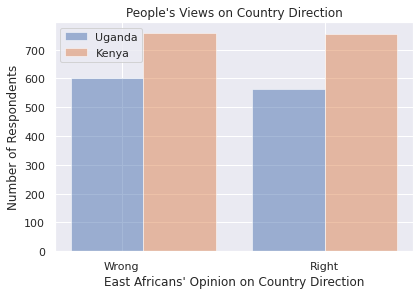

In [ ]:
#Ploting a histogram for East African countries 
sns.set(style="darkgrid") 
plt.hist([direction_uganda.dropna(), direction_kenya.dropna()],bins = 2, alpha = 0.5, label = ['Uganda', 'Kenya']);
decorate(xlabel="East Africans' Opinion on Country Direction",
         ylabel='Number of Respondents',
         title="People's Views on Country Direction")

responses = [0.19,0.75]

labels = ['Wrong',
          'Right',
          ]
plt.legend(loc='best')

plt.xticks(responses,labels);

In [ ]:
uganda_dir = direction_uganda.value_counts(normalize=True)
uganda_dir

Going in the right direction    0.51588
Going in the wrong direction    0.48412
Name: Q3, dtype: float64

In [ ]:
kenya_dir = direction_kenya.value_counts(normalize=True)
kenya_dir

Going in the right direction    0.500661
Going in the wrong direction    0.499339
Name: Q3, dtype: float64

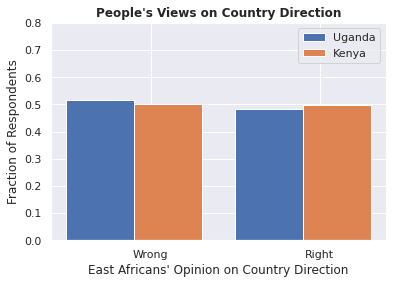

In [ ]:
sns.set(style="darkgrid")
# set width of bar
barWidth = 0.4
# Set position of bar on X axis
r1 = np.arange(len(uganda_dir))
r2 = [x + barWidth for x in r1] 
# Make the plot
plt.bar(r1,uganda_dir,width=barWidth, edgecolor='white',align='center', label='Uganda')
plt.bar(r2,kenya_dir, width=barWidth, edgecolor='white', align='center',label='Kenya')
 
# Add xticks on the middle of the group bars
plt.xlabel("East Africans' Opinion on Country Direction")
plt.ylabel('Fraction of Respondents')
plt.title("People's Views on Country Direction",fontweight='bold')
plt.ylim(0, 0.8)
responses = [0.3,1.3]

labels = ['Wrong',
          'Right',       
          ]

plt.xticks(responses, labels);
# Create legend & Show graphic
plt.legend()
plt.show()


##PMF and Plotting the Distribution

In [ ]:
direction_uganda.describe()

count                             1165
unique                               2
top       Going in the right direction
freq                               601
Name: Q3, dtype: object

In [ ]:
direction_uganda.value_counts()

Going in the right direction    601
Going in the wrong direction    564
Name: Q3, dtype: int64

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist


In [ ]:
from empiricaldist import Pmf

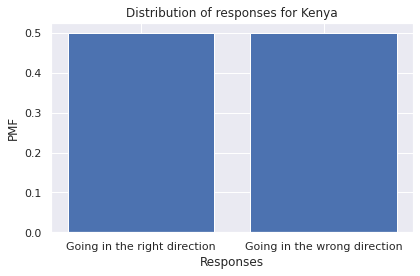

In [ ]:
sns.set(style="darkgrid")
pmf1 = Pmf.from_seq(direction_kenya.dropna())
pmf1.bar()

decorate(xlabel='Responses',
         ylabel='PMF',
         title='Distribution of responses for Kenya')

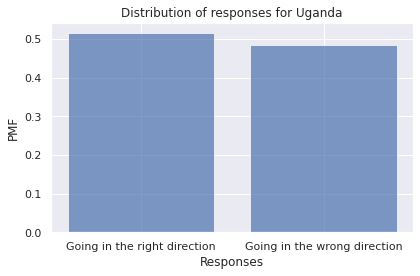

In [ ]:
sns.set(style="darkgrid")
pmf2 = Pmf.from_seq(direction_uganda.dropna())
pmf2.bar(alpha=0.7)

decorate(xlabel='Responses',
         ylabel='PMF',
         title='Distribution of responses for Uganda')

##Resampling



In [ ]:
def resample_rows_weighted(df, column):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    weights = df[column]
    sample = df.sample(n=len(df), replace=True, weights=weights)
    return sample

In [ ]:
def resample_by_country(df, column):
    """Resample rows within each year.

    df: DataFrame
    column: string name of weight variable

    returns DataFrame
    """
    grouped = df.groupby('COUNTRY')
    samples = [resample_rows_weighted(group, column)
               for _, group in grouped]
    sample = pd.concat(samples, ignore_index=True)
    return sample

In [ ]:
%time sample = resample_by_country(df, 'withinwt')

CPU times: user 11.9 s, sys: 219 ms, total: 12.1 s
Wall time: 12.2 s


##Requesting Government Action
We will look at responses to the following question on the likelihood of citizens to join others to request government action when they are dissatisfied with the government.

>Question : 27A 

>Question: Here is a list of actions that people sometimes take as citizens when they are dissatisfied with government performance. For each of these, please tell me whether you, personally, have done any of these things during the past year. If not, would you do this if you had the chance: Joined others in your community to request action from government

>Variable Label: Q27a. Join others to request government action

>Values: 0-4, 9, 98, -1

>Value Labels: 0=No, would never do this, 1=No, but would do if had the chance, 2=Yes, once or twice, 3=Yes, several times, 4=Yes, often, 9=Don’t know, 98=Refused to answer, -1=Missing

>Source: Afrobarometer Round 6


In [ ]:
#Government Action Request [Agree vs Disagree]
action = df['Q27A']
action.dtype

CategoricalDtype(categories=['Approve', 'Disapprove', 'Don’t know',
                  'Neither Approve Nor Disapprove', 'Refused',
                  'Strongly Approve', 'Strongly Disapprove'],
                 ordered=False)

In [ ]:
action.value_counts().sort_index()

Approve                            5557
Disapprove                        11003
Don’t know                         1356
Neither Approve Nor Disapprove     1127
Refused                             121
Strongly Approve                   3971
Strongly Disapprove               22688
Name: Q27A, dtype: int64

In [ ]:
#Kenya's Request for Government Action
action_kenya=df[is_kenya]['Q27A']
action_kenya.value_counts()

Strongly Disapprove               804
Disapprove                        327
Approve                           186
Strongly Approve                  162
Don’t know                         72
Neither Approve Nor Disapprove     48
Refused                             0
Name: Q27A, dtype: int64

In [ ]:
order = ['Approve','Strongly Approve', 'Neither Approve Nor Disapprove', 'Disapprove','Strongly Disapprove', 'Refused',"Don’t know"]
reordered_kenya_action = action_kenya.cat.reorder_categories(order, ordered=True)

In [ ]:
#Uganda's Request for Government Action
action_uganda=df[is_uganda]['Q27A']
action_uganda.value_counts()

Strongly Disapprove               722
Disapprove                        242
Approve                           105
Strongly Approve                   98
Neither Approve Nor Disapprove     17
Don’t know                         13
Refused                             3
Name: Q27A, dtype: int64

In [ ]:
order = ['Approve','Strongly Approve', 'Neither Approve Nor Disapprove', 'Disapprove','Strongly Disapprove', 'Refused',"Don’t know"]
reordered_uganda_action = action_uganda.cat.reorder_categories(order, ordered=True)

In [ ]:
#Description
reordered_uganda_action.describe()

count                    1200
unique                      7
top       Strongly Disapprove
freq                      722
Name: Q27A, dtype: object

In [ ]:
#Description
reordered_kenya_action.describe()

count                    1599
unique                      6
top       Strongly Disapprove
freq                      804
Name: Q27A, dtype: object

#Dropping Nan Values

In [ ]:
#Nan for Kenya
reordered_kenya_action.replace(-1, np.nan, inplace=True);
reordered_kenya_action.replace('Don’t know', np.nan, inplace=True);
reordered_kenya_action.replace('Missing', np.nan, inplace=True);
reordered_kenya_action.replace('Refused', np.nan, inplace=True);

reordered_kenya_action.value_counts(dropna=False)

Strongly Disapprove               804
Disapprove                        327
Approve                           186
Strongly Approve                  162
NaN                                72
Neither Approve Nor Disapprove     48
Name: Q27A, dtype: int64

In [ ]:
#Nan for Uganda
reordered_uganda_action.replace(-1, np.nan, inplace=True);
reordered_uganda_action.replace('Don’t know', np.nan, inplace=True);
reordered_uganda_action.replace('Missing', np.nan, inplace=True);
reordered_uganda_action.replace('Refused', np.nan, inplace=True);

reordered_uganda_action.value_counts(dropna=False)

Strongly Disapprove               722
Disapprove                        242
Approve                           105
Strongly Approve                   98
Neither Approve Nor Disapprove     17
NaN                                16
Name: Q27A, dtype: int64

In [ ]:
#Recode 
recode_kenya = {"Strongly Approve":"Approve","Strongly Disapprove":"Disapprove"}
recoded_kenya_action = reordered_kenya_action.replace(recode_kenya)
values(recoded_kenya_action)

Approve                            348
Disapprove                        1131
Neither Approve Nor Disapprove      48
Name: Q27A, dtype: int64

In [ ]:
#Recode 
recode_uganda = {"Strongly Approve":"Approve","Strongly Disapprove":"Disapprove"}
recoded_uganda_action = reordered_uganda_action.replace(recode_uganda )
values(recoded_uganda_action)

Approve                           203
Disapprove                        964
Neither Approve Nor Disapprove     17
Name: Q27A, dtype: int64

In [ ]:
#Description
recoded_uganda_action.describe()

count           1184
unique             3
top       Disapprove
freq             964
Name: Q27A, dtype: object

In [ ]:
#Description
recoded_kenya_action.describe()

count           1527
unique             3
top       Disapprove
freq            1131
Name: Q27A, dtype: object

In [ ]:
uganda_probs = recoded_uganda_action.value_counts(normalize=True)
uganda_probs

Disapprove                        0.814189
Approve                           0.171453
Neither Approve Nor Disapprove    0.014358
Name: Q27A, dtype: float64

In [ ]:
kenya_probs = recoded_kenya_action.value_counts(normalize=True)
kenya_probs 

Disapprove                        0.740668
Approve                           0.227898
Neither Approve Nor Disapprove    0.031434
Name: Q27A, dtype: float64

Graphical Representation (Counts)

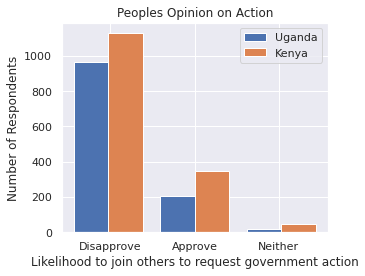

In [ ]:
#East African Action
sns.set(style="darkgrid") 
plt.hist([recoded_uganda_action.dropna(),recoded_kenya_action.dropna()],bins=3, label = ['Uganda', 'Kenya']);
decorate(xlabel='Likelihood to join others to request government action',
         ylabel='Number of Respondents',
         title='Peoples Opinion on Action')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.show()
responses = [0.35,1,1.65]

labels = ['Disapprove',
          'Approve',
          'Neither',
          ]

plt.xticks(responses, labels);
plt.legend(loc = "upper right")


Graphical Representation (Fraction)

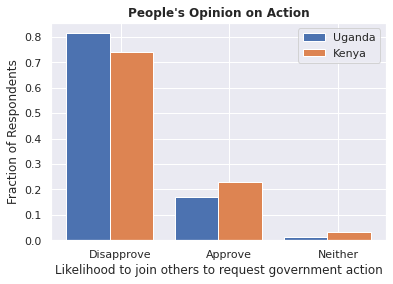

In [ ]:
sns.set(style="darkgrid")
# set width of bar
barWidth = 0.4
# Set position of bar on X axis
r1 = np.arange(len(uganda_probs))
r2 = [x + barWidth for x in r1] 
# Make the plot
plt.bar(r1,uganda_probs,width=barWidth, edgecolor='white', label='Uganda')
plt.bar(r2,kenya_probs, width=barWidth, edgecolor='white', label='Kenya')
 
# Add xticks on the middle of the group bars
plt.xlabel('Likelihood to join others to request government action')
plt.ylabel('Fraction of Respondents')
plt.title("People's Opinion on Action",fontweight='bold')
responses = [0.3,1.3,2.3]

labels = ['Disapprove',
          'Approve',
          'Neither',
          ]

plt.xticks(responses, labels);
# Create legend & Show graphic
plt.legend()
plt.show()

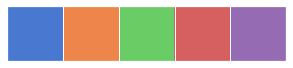

In [ ]:
muted = sns.color_palette('muted', 5)
sns.palplot(muted)

In [ ]:
color_map = {'Disapprove': muted[3], 
              'Approve': muted[4],
             'Neither Approve Nor Disapprove': muted[1]}

##PMF Plotting and Distribution

In [ ]:
recoded_uganda_action.describe()

count           1184
unique             3
top       Disapprove
freq             964
Name: Q27A, dtype: object

In [ ]:
recoded_kenya_action.describe()

count           1527
unique             3
top       Disapprove
freq            1131
Name: Q27A, dtype: object

In [ ]:
recoded_kenya_action.value_counts().sort_index()

Approve                            348
Disapprove                        1131
Neither Approve Nor Disapprove      48
Name: Q27A, dtype: int64

In [ ]:
recoded_uganda_action.value_counts().sort_index()

Approve                           203
Disapprove                        964
Neither Approve Nor Disapprove     17
Name: Q27A, dtype: int64

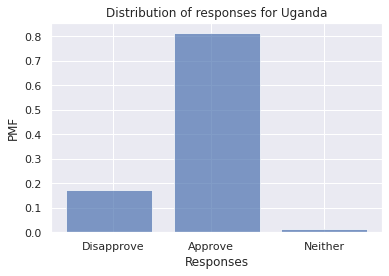

In [ ]:
sns.set(style="darkgrid")
pmf3 = Pmf.from_seq(recoded_uganda_action.dropna())
pmf3.bar(alpha=0.7)

decorate(xlabel='Responses',
         ylabel='PMF',
         title='Distribution of responses for Uganda')
responses = [0.04,0.95,2]

labels = ['Disapprove',
          'Approve',
          'Neither',
          ]

plt.xticks(responses, labels);

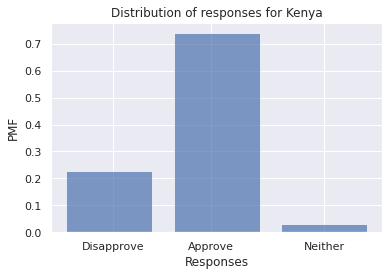

In [ ]:
sns.set(style="darkgrid")
pmf3 = Pmf.from_seq(recoded_kenya_action.dropna())
pmf3.bar(alpha=0.7)

decorate(xlabel='Responses',
         ylabel='PMF',
         title='Distribution of responses for Kenya')
responses = [0.04,0.95,2]

labels = ['Disapprove',
          'Approve',
          'Neither',
          ]

plt.xticks(responses, labels);

##Group by country direction
Now we can use groupby to group the respondents by their opinion on the country's direction as to whether in the right direction or wrong direction, or simply don't know. 

In [ ]:
by_countryDir1 = df[is_kenya].groupby(direction_kenya)
by_countryDir1.describe()

ADULT_CT                                          \
                                count      mean       std  min  25%  50%  75%   
Q3                                                                              
Going in the right direction    757.0  2.804491  1.637468 -1.0  2.0  2.0  3.0   
Going in the wrong direction    755.0  2.670199  1.831380 -1.0  2.0  2.0  3.0   

                                    CALLS                                     \
                               max  count      mean       std  min  25%  50%   
Q3                                                                             
Going in the right direction  11.0  757.0  1.013210  0.114249  1.0  1.0  1.0   
Going in the wrong direction  23.0  755.0  1.013245  0.114398  1.0  1.0  1.0   

                                         Q113                             \
                              75%  max  count       mean       std   min   
Q3                                                                         
Going in the right direction  1.0  2.0  757.0  30.173052  8.467049  20.0   
Going in the wrong direction  1.0  2.0  755.0  29.158940  7.953356  20.0   

                                                     withinwt            \
                               25%   50%   75%   max    count      mean   
Q3                                                                        
Going in the right direction  24.0  27.0  35.0  55.0    757.0  1.011343   
Going in the wrong direction  23.0  27.0  34.0  55.0    755.0  0.992451   

                                                                      \
                                   std       min       25%       50%   
Q3                                                                     
Going in the right direction  0.431291  0.285785  0.686358  0.913909   
Going in the wrong direction  0.420131  0.285785  0.694706  0.892167   

                                                 Combinwt                      \
                                   75%       max    count      mean       std   
Q3                                                                              
Going in the right direction  1.279821  2.534635    757.0  0.758982  0.323671   
Going in the wrong direction  1.244034  2.534635    755.0  0.744803  0.315295   

                                                                      \
                                   min       25%       50%       75%   
Q3                                                                     
Going in the right direction  0.214473  0.515090  0.685861  0.960466   
Going in the wrong direction  0.214473  0.521355  0.669544  0.933609   

                                       LivedPoverty                           \
                                   max        count      mean       std  min   
Q3                                                                             
Going in the right direction  1.902165        756.0  0.910847  0.770130  0.0   
Going in the wrong direction  1.902165        751.0  1.269241  0.799399  0.0   

                                                  
                              25%  50%  75%  max  
Q3                                                
Going in the right direction  0.4  0.8  1.4  3.8  
Going in the wrong direction  0.6  1.2  1.8  4.0

In [ ]:
by_countryDir = df[is_uganda].groupby(direction_uganda)
by_countryDir.describe()

ADULT_CT                                          \
                                count      mean       std  min  25%  50%  75%   
Q3                                                                              
Going in the right direction    601.0  4.071547  2.785655  1.0  2.0  3.0  5.0   
Going in the wrong direction    564.0  3.955674  2.980068  1.0  2.0  3.0  5.0   

                                    CALLS                                     \
                               max  count      mean       std  min  25%  50%   
Q3                                                                             
Going in the right direction  17.0  601.0  1.031614  0.175116  1.0  1.0  1.0   
Going in the wrong direction  20.0  564.0  1.028369  0.166171  1.0  1.0  1.0   

                                         Q113                             \
                              75%  max  count       mean       std   min   
Q3                                                                         
Going in the right direction  1.0  2.0  601.0  27.445923  3.614898  20.0   
Going in the wrong direction  1.0  2.0  564.0  27.081560  3.678039  20.0   

                                                     withinwt            \
                               25%   50%   75%   max    count      mean   
Q3                                                                        
Going in the right direction  25.0  26.0  30.0  35.0    601.0  1.008212   
Going in the wrong direction  24.0  26.0  30.0  35.0    564.0  0.987731   

                                                                      \
                                   std       min       25%       50%   
Q3                                                                     
Going in the right direction  0.528471  0.144654  0.594428  0.979996   
Going in the wrong direction  0.504651  0.144654  0.589181  0.979996   

                                                 Combinwt                      \
                                   75%       max    count      mean       std   
Q3                                                                              
Going in the right direction  1.288372  3.001575    601.0  1.008212  0.528471   
Going in the wrong direction  1.277667  3.001575    564.0  0.987731  0.504651   

                                                                      \
                                   min       25%       50%       75%   
Q3                                                                     
Going in the right direction  0.144654  0.594428  0.979996  1.288372   
Going in the wrong direction  0.144654  0.589181  0.979996  1.277667   

                                       LivedPoverty                           \
                                   max        count      mean       std  min   
Q3                                                                             
Going in the right direction  3.001575        597.0  1.238861  0.783618  0.0   
Going in the wrong direction  3.001575        556.0  1.494604  0.769631  0.0   

                                                  
                              25%  50%  75%  max  
Q3                                                
Going in the right direction  0.6  1.2  1.8  3.8  
Going in the wrong direction  1.0  1.4  2.0  3.8

Next we will plot the distribution of responses in each group.

But first we'll make a dictionary that maps from each group to a color.

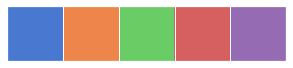

In [ ]:
muted = sns.color_palette('muted', 5)
sns.palplot(muted)

In [ ]:
color_map = {'Going in the right direction': muted[0],
             'Going in the wrong direction': muted[2]}

Now we'll make a PMF of responses for each group.

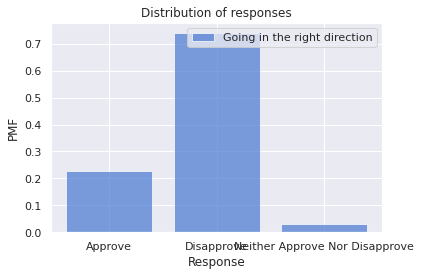

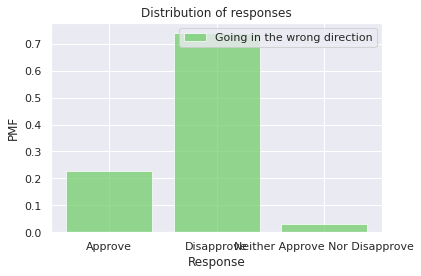

In [ ]:
for name in color_map:
    sns.set(style="darkgrid")
    group = by_countryDir1.get_group(name)
    
    plt.figure()
    pmf3 = Pmf.from_seq(recoded_kenya_action)
    pmf3.bar(label=name, color=color_map[name], alpha=0.7)
    
    decorate(xlabel='Response',
             ylabel='PMF',
             title='Distribution of responses')
    
    
    plt.legend(loc='upper right')


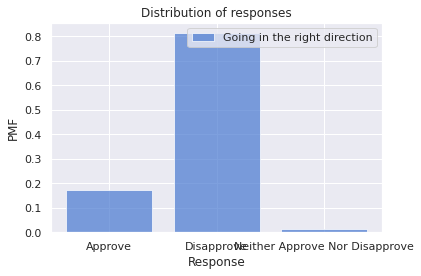

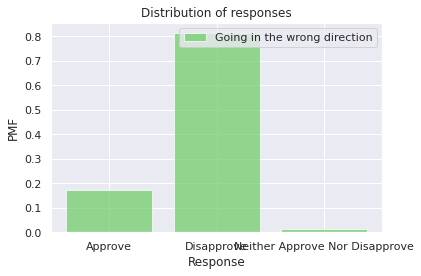

In [ ]:
for name in color_map:
    sns.set(style="darkgrid")
    group = by_countryDir.get_group(name)
    
    plt.figure()
    pmf3 = Pmf.from_seq(recoded_uganda_action)
    pmf3.bar(label=name, color=color_map[name], alpha=0.7)
    
    decorate(xlabel='Response',
             ylabel='PMF',
             title='Distribution of responses')
    
    
    plt.legend(loc='upper right')


##Plotting Results Using Cross Tabulation

By plotting the results using a cross tabulation it would show the relationships are between the two variables.

In [ ]:
ct_kenya = pd.crosstab(direction_kenya, recoded_kenya_action, margins=True, margins_name="Total", normalize=True)
ct_kenya

Q27A,Approve,Disapprove,Neither Approve Nor Disapprove,Total
Q3,,,,
Going in the right direction,0.134523,0.357584,0.005491,0.497598
Going in the wrong direction,0.095402,0.381606,0.025395,0.502402
Total,0.229925,0.739190,0.030885,1.000000


In [ ]:
ct_uganda = pd.crosstab(direction_uganda, recoded_uganda_action, margins=True, margins_name="Total", normalize=True)
ct_uganda

Q27A,Approve,Disapprove,Neither Approve Nor Disapprove,Total
Q3,,,,
Going in the right direction,0.102342,0.402428,0.011275,0.516045
Going in the wrong direction,0.068517,0.411969,0.003469,0.483955
Total,0.170859,0.814397,0.014744,1.000000
